# DEMO 분석
#### 기본
- columns : 고객번호, 성별, 연령대, 거주지역
- row : 19383건
- 성별 : 남 3,485명 vs 여 15,898명
- 연령대 : 하단 참고
- 거주지역 : 42개 지역(null 1개 지역 포함 - 178개)

#### 체크 포인트
- MOBILE 사용자의 이용횟수가 압도적임 (feat. 온라인 몰)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
import warnings

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

### 성별

In [2]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 성별, count(*) count from demo
group by 성별
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_d = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_d.head()

,성별,COUNT
0,M,3485
1,F,15898


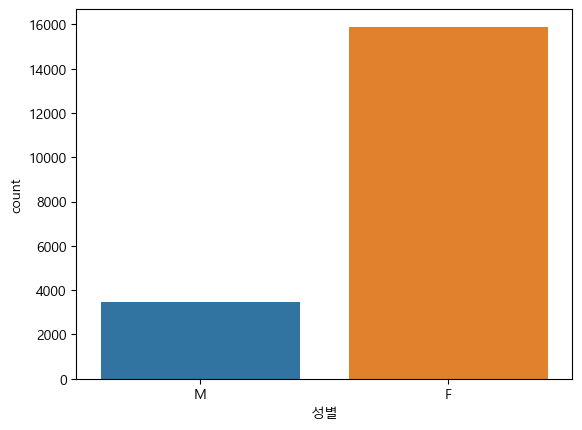

In [3]:
sns.barplot(data=df_d, x='성별', y='COUNT')
plt.xlabel('성별')
plt.ylabel('count')
plt.show()

### 연령대

In [4]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 연령대, count(*) count from demo
group by 연령대
order by 연령대
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_d = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_d.head()

,연령대,COUNT
0,19세이하,17
1,20세~24세,283
2,25세~29세,685
3,30세~34세,1679
4,35세~39세,2769


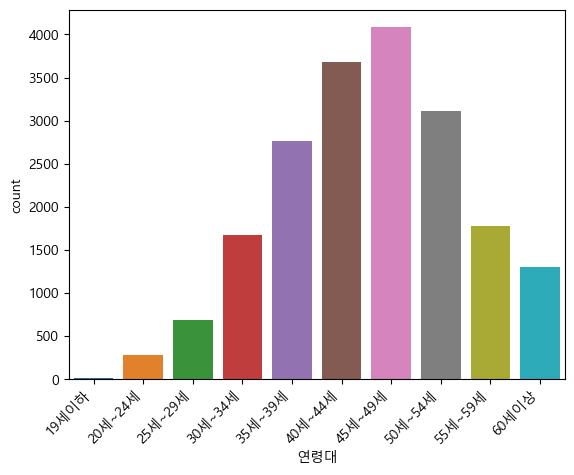

In [5]:
sns.barplot(data=df_d, x='연령대', y='COUNT')
plt.xticks(rotation=45, ha='right')
plt.xlabel('연령대')
plt.ylabel('count')
plt.show()

### 거주지별

In [6]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 거주지역, count(*) count from demo
group by 거주지역
order by count(*) desc
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_d = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_d.head()

,거주지역,COUNT
0,100,5993
1,460,1922
2,055,1431
3,210,1071
4,500,860


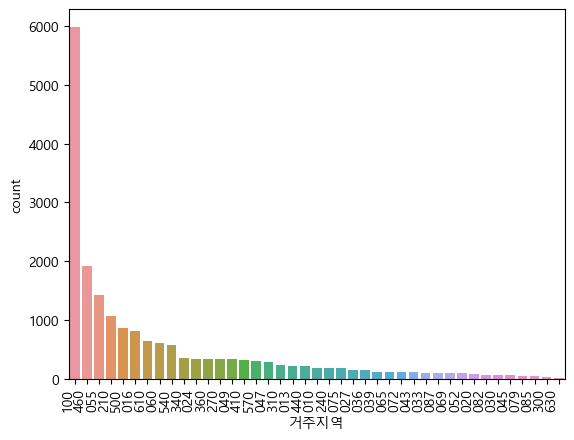

In [14]:
sns.barplot(data=df_d, x='거주지역', y='COUNT')
plt.xticks(rotation=90, ha='right')
plt.xlabel('거주지역')
plt.ylabel('count')
plt.show()

### 거주지역별 매출

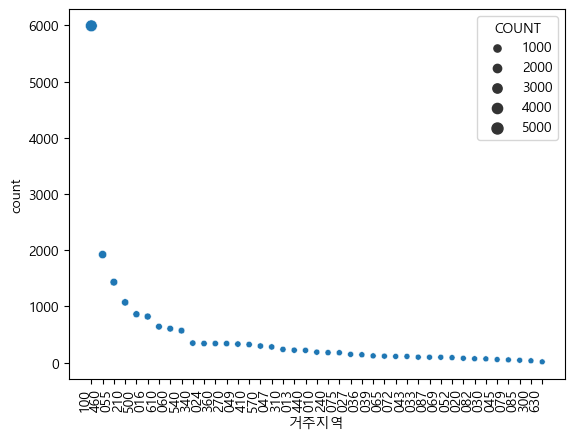

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_d, x='거주지역', y='COUNT', size='COUNT')
plt.xticks(rotation=90, ha='right')
plt.xlabel('거주지역')
plt.ylabel('count')
plt.show()
